In [6]:
from General_function import *
from GA_function import *
import random
import numpy as np
import yaml

In [7]:
with open(file='DATA.yaml', mode='r', encoding='UTF-8') as f:
    data = yaml.safe_load(f)
target = data['TARGET']
generation = data['GENERATION']
population_size = data['GA']['POPULATION_SIZE']
k_fit = data['GA']['K_FIT']
b_fit = data['GA']['B_FIT']
p_cross = data['GA']['CROSS']['P']
n_cross = data['GA']['CROSS']['N']
p_mutation = data['GA']['MUTATION']['P']
l_mutation = data['GA']['MUTATION']['L']

In [8]:
C_history = []
ga = GeneticAlgorithm(target, population_size, k_fit, b_fit, p_cross, n_cross, p_mutation, l_mutation)
print(f'数据集：{ga.Target}\n【理论最优值：{ga.Optimum}】【n={ga.N};m={ga.M}】')
print(f'第0代种群，Cmax={ga.C_max}')
C_history.append(ga.C_max)

for gen in range(1, generation+1):
    if ga.C_max == ga.Optimum:
        print(f'第{gen - 1}代达到理论最优')
        break

    # 选择
    # ga.ProportionalSelect()

    # 与最优个体进行交叉
    cross_index1 = np.array(ga.Fit).argmax()
    for cross_index2 in range(ga.PopSize):
        if (random.random() <= ga.P_Cross) and (cross_index1 != cross_index2):
            ga.Cross(cross_index1, cross_index2)

    # 最优个体不进行突变
    for mutation_index in range(ga.PopSize):
        if (random.random() <= ga.P_Mutation) and (cross_index1 != mutation_index):
            ga.Mutation(mutation_index)

    if gen % 10 == 0:
        print(f'第{gen}代种群，Cmax={ga.C_max}')
    C_history.append(ga.C_max)

数据集：ft10
【理论最优值：930】【n=10】;m=10
第0代种群，Cmax=1110.0
第10代种群，Cmax=1033.0


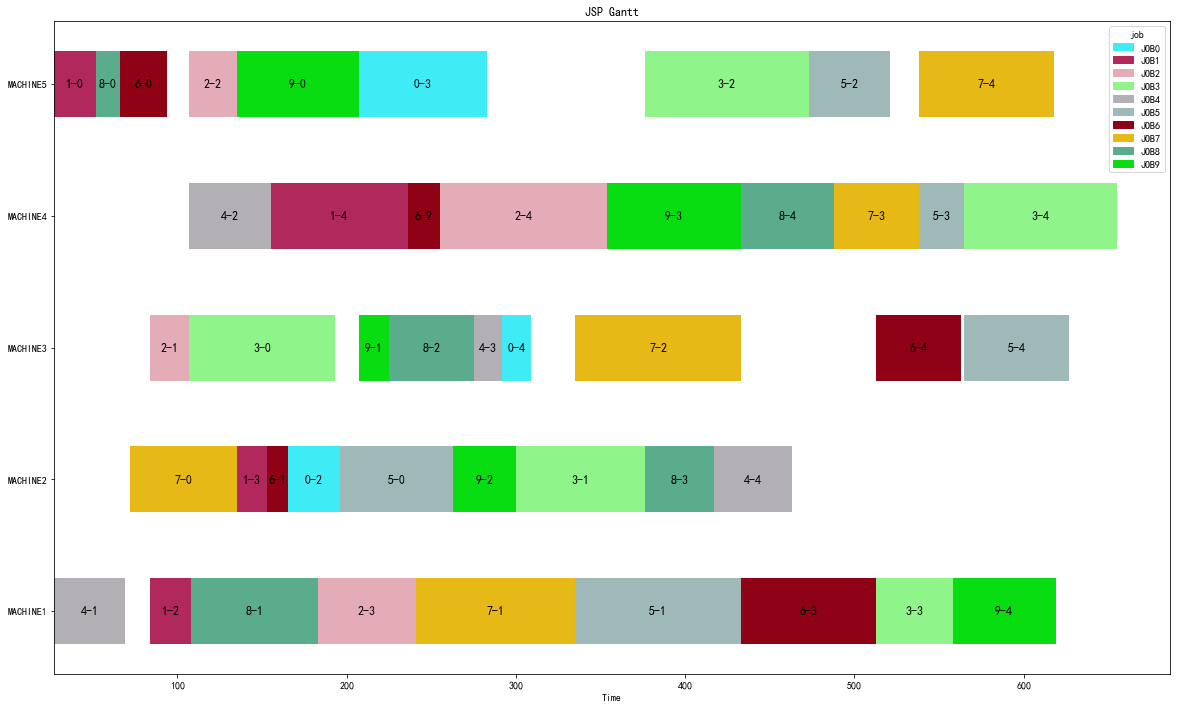

In [ ]:
draw_Gantt(ga.T_op)

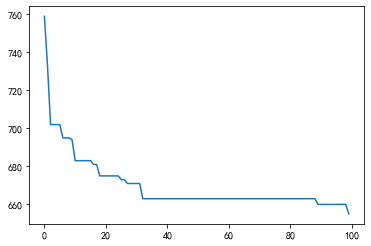

In [ ]:
plt.plot(C_history)
plt.show()